In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# load data
DenseNet121_rf = pd.read_csv('../results/after_aug/results_DenseNet121_rf.csv')
DenseNet121_svm = pd.read_csv('../results/after_aug/results_DenseNet121_svm.csv')
DenseNet121_softmax = pd.read_csv('../results/after_aug/results_DenseNet121_softmax.csv')
InceptionV3_rf = pd.read_csv('../results/after_aug/results_InceptionV3_rf.csv')
InceptionV3_svm = pd.read_csv('../results/after_aug/results_InceptionV3_svm.csv')
InceptionV3_softmax = pd.read_csv('../results/after_aug/results_InceptionV3_softmax.csv')
ResNet101_rf = pd.read_csv('../results/after_aug/results_ResNet101_rf.csv')
ResNet101_svm = pd.read_csv('../results/after_aug/results_ResNet101_svm.csv')
ResNet101_softmax = pd.read_csv('../results/after_aug/results_ResNet101_softmax.csv')
VGG16_rf = pd.read_csv('../results/after_aug/results_VGG16_rf.csv')
VGG16_svm = pd.read_csv('../results/after_aug/results_VGG16_svm.csv')
VGG16_softmax = pd.read_csv('../results/after_aug/results_VGG16_softmax.csv')
Xception_softmax = pd.read_csv('../results/after_aug/results_Xception_softmax.csv')
Xception_svm = pd.read_csv('../results/after_aug/results_Xception_svm.csv')

In [52]:
# combine al results into a single DataFrame
all_results = pd.concat([
    DenseNet121_rf,
    DenseNet121_svm,
    DenseNet121_softmax,
    InceptionV3_rf,
    InceptionV3_svm,
    InceptionV3_softmax,
    ResNet101_rf,
    ResNet101_svm,
    ResNet101_softmax,
    VGG16_rf,
    VGG16_svm,
    VGG16_softmax,
    Xception_softmax,
    Xception_svm
], ignore_index=True)

# list of metric columns
metric_cols = [
    "Accuracy", "Precision", "Recall", "Specificity",
    "F1 Score", "ROC AUC", "Training Time (s)"
]

# group by architecture and classifier, then calculate mean and std
grouped = all_results.groupby(["Architecture", "Classifier"])[metric_cols]

mean_df = grouped.mean().add_suffix(" Mean")
std_df = grouped.std().add_suffix(" Sd")

# merge mean and sd side by side
summary_df = pd.concat([mean_df, std_df], axis=1).reset_index()

summary_df

,Architecture,Classifier,Accuracy Mean,Precision Mean,Recall Mean,Specificity Mean,F1 Score Mean,ROC AUC Mean,Training Time (s) Mean,Accuracy Sd,Precision Sd,Recall Sd,Specificity Sd,F1 Score Sd,ROC AUC Sd,Training Time (s) Sd
0,DenseNet121,rf,0.888132,0.887556,0.883841,0.962926,0.883974,0.979689,86.482625,0.012567,0.014482,0.011926,0.003834,0.013627,0.002385,6.598628
1,DenseNet121,softmax,0.852420,0.854346,0.844649,0.951001,0.837417,0.972464,528.396451,0.011199,0.011755,0.011707,0.003738,0.012598,0.004914,41.536877
2,DenseNet121,svm,0.943977,0.943892,0.941769,0.981467,0.942041,0.993536,86.180357,0.007961,0.007547,0.006614,0.002673,0.007250,0.001863,3.351037
3,InceptionV3,rf,0.805323,0.800755,0.798639,0.935505,0.796688,0.950532,67.087777,0.021300,0.023257,0.021469,0.006901,0.022508,0.005397,6.339372
4,InceptionV3,softmax,0.778713,0.777407,0.767832,0.926463,0.759958,0.942647,547.871206,0.012100,0.013302,0.011156,0.004026,0.012748,0.008681,27.035669
5,InceptionV3,svm,0.887080,0.884690,0.882602,0.962715,0.882156,0.979385,97.030226,0.012767,0.012272,0.012561,0.004216,0.012812,0.003484,4.040902
6,ResNet101,rf,0.816705,0.812111,0.809134,0.939183,0.807758,0.950232,68.206301,0.012516,0.011479,0.011985,0.004147,0.012220,0.005088,3.516122
7,ResNet101,softmax,0.744227,0.751020,0.732092,0.914816,0.709498,0.934610,401.280816,0.020839,0.019485,0.020377,0.006666,0.024302,0.009562,49.929772
8,ResNet101,svm,0.842439,0.839912,0.836127,0.947513,0.835928,0.964062,104.005022,0.013706,0.013317,0.011239,0.004548,0.012254,0.002569,2.063130
9,VGG16,rf,0.879729,0.879773,0.874980,0.960080,0.875230,0.977169,37.752481,0.008827,0.011082,0.008481,0.002596,0.010101,0.002038,0.160001


/var/folders/wx/xgpv52sj18xfvw0gwvgctrjr0000gq/T/ipykernel_12036/563571567.py:7: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


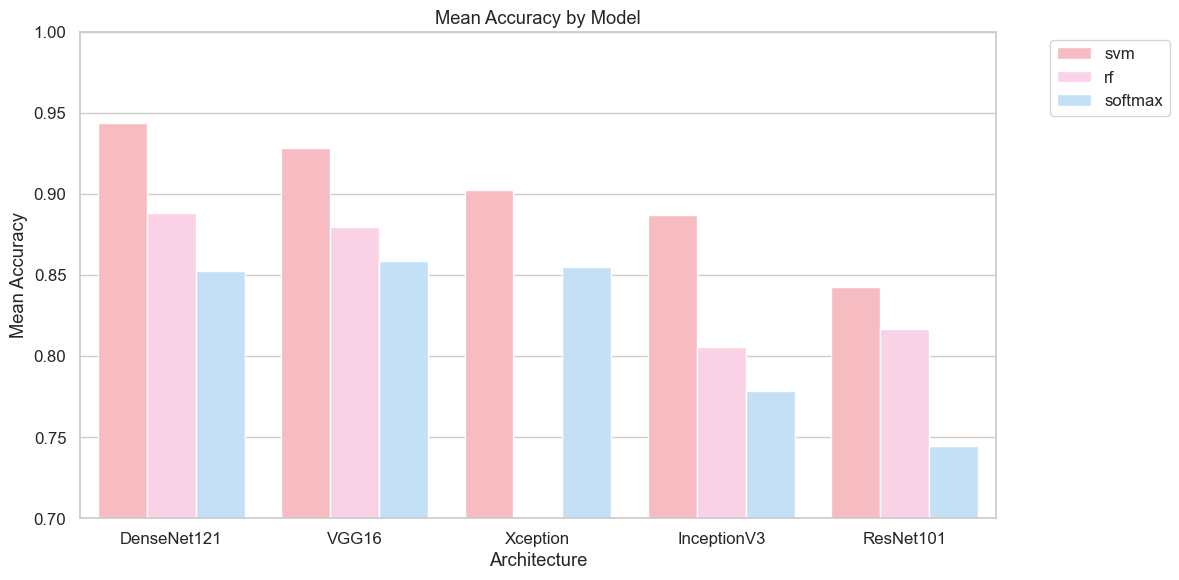

In [53]:
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(12,6))
pastel_palette = ["#FFB3BA", "#FFCCE5", "#BAE1FF", "#BAFFC9", "#E0BBE4"]


#barplot: accuracy
sns.barplot(
    data=summary_df.sort_values("Accuracy Mean", ascending=False),
    x="Architecture", y="Accuracy Mean", hue="Classifier", palette=pastel_palette
)
plt.title("Mean Accuracy by Model")
plt.ylabel("Mean Accuracy")
plt.ylim(0.7, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/wx/xgpv52sj18xfvw0gwvgctrjr0000gq/T/ipykernel_12036/882958846.py:4: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


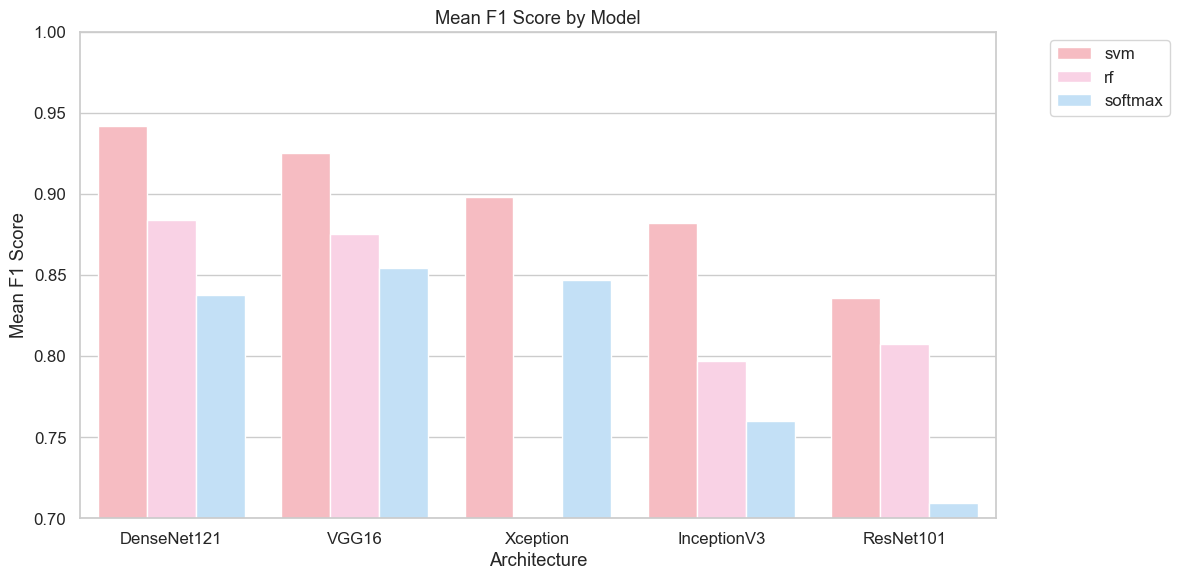

In [54]:
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(12,6))
# for F1 Score
sns.barplot(
    data=summary_df.sort_values("F1 Score Mean", ascending=False),
    x="Architecture", y="F1 Score Mean", hue="Classifier", palette=pastel_palette
)
plt.title("Mean F1 Score by Model")
plt.ylabel("Mean F1 Score")
plt.ylim(0.7, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/wx/xgpv52sj18xfvw0gwvgctrjr0000gq/T/ipykernel_12036/675318377.py:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


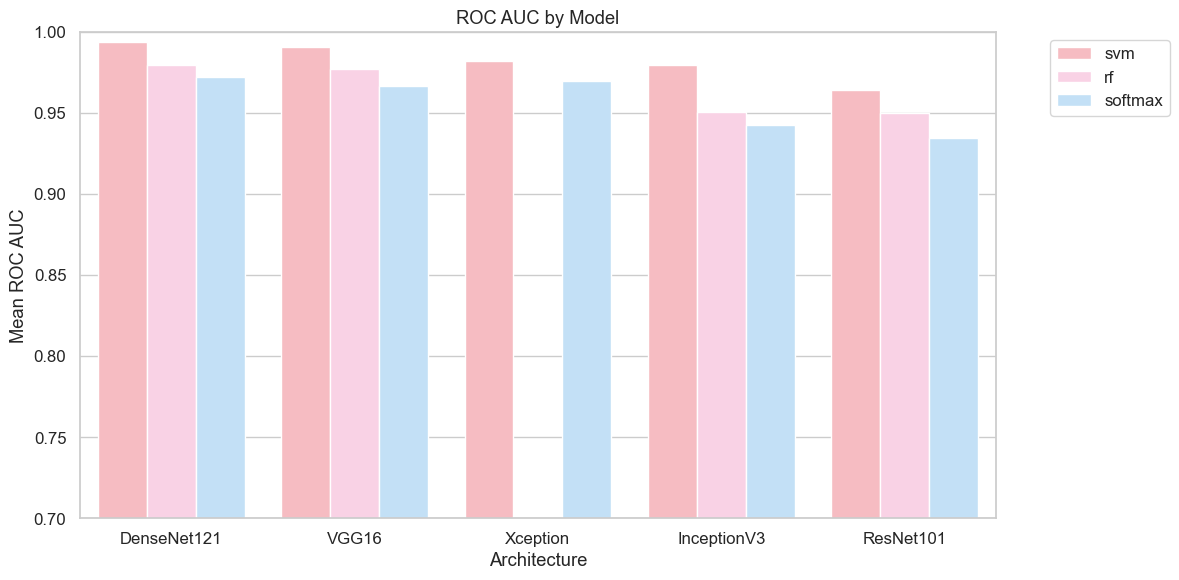

In [55]:
#for ROC AUC
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(12,6))
# for F1 Score
sns.barplot(
    data=summary_df.sort_values("ROC AUC Mean", ascending=False),
    x="Architecture", y="ROC AUC Mean", hue="Classifier", palette=pastel_palette
)
plt.title("ROC AUC by Model")
plt.ylabel("Mean ROC AUC")
plt.ylim(0.7, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/wx/xgpv52sj18xfvw0gwvgctrjr0000gq/T/ipykernel_12036/1431399168.py:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


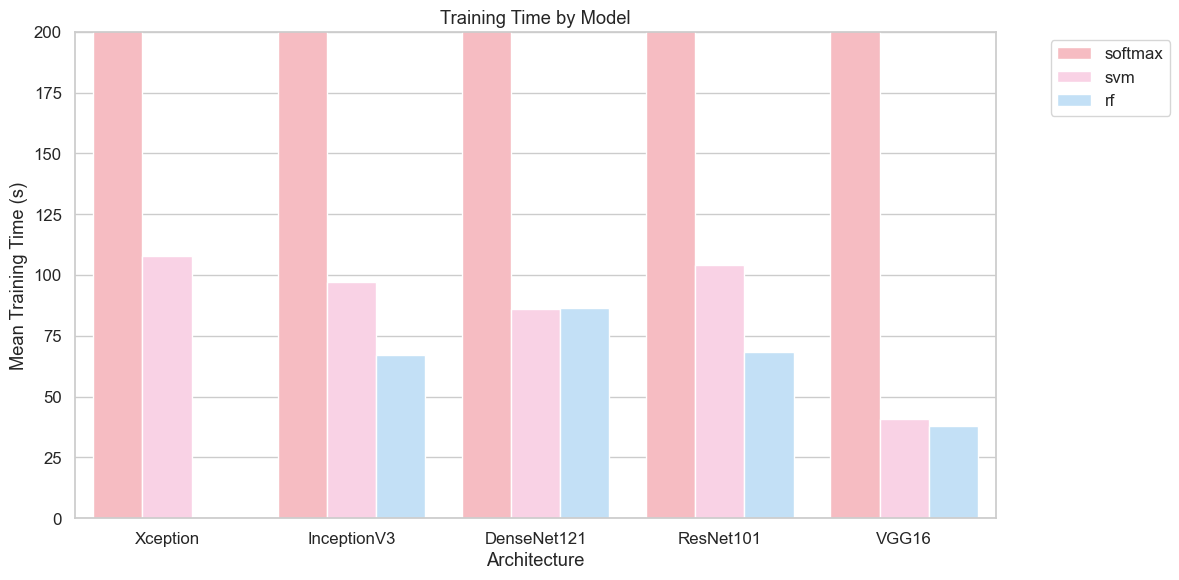

In [56]:
# and training time
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(12,6))
# for F1 Score
sns.barplot(
    data=summary_df.sort_values("Training Time (s) Mean", ascending=False),
    x="Architecture", y="Training Time (s) Mean", hue="Classifier", palette=pastel_palette
)
plt.title("Training Time by Model")
plt.ylabel("Mean Training Time (s)")
plt.ylim(0, 200)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/wx/xgpv52sj18xfvw0gwvgctrjr0000gq/T/ipykernel_12036/4253100051.py:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(


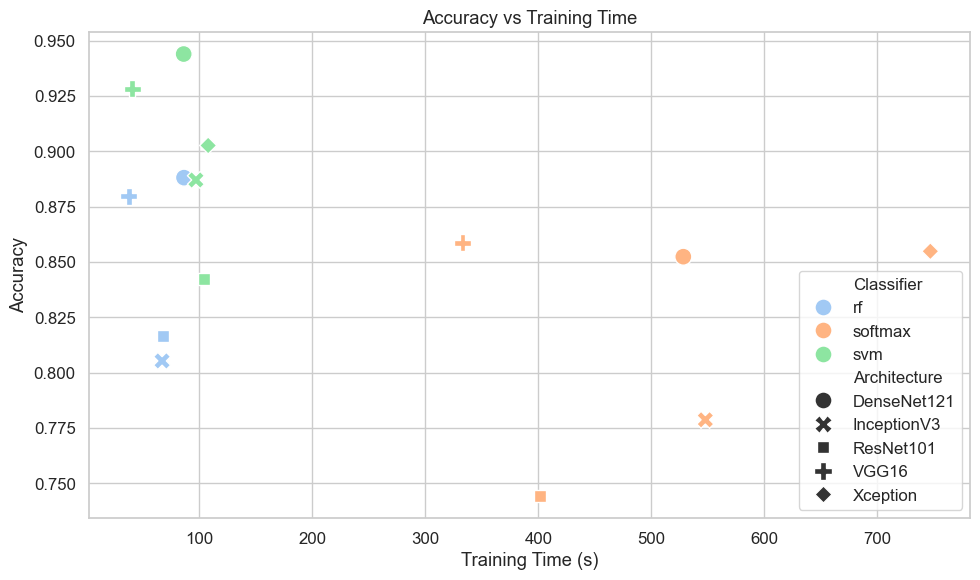

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=summary_df,
    x="Training Time (s) Mean",
    y="Accuracy Mean",
    hue="Classifier",
    palette=sns.color_palette("pastel"),
    style="Architecture",
    s=150
)
plt.title("Accuracy vs Training Time")
plt.xlabel("Training Time (s)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


In [58]:
# load df from before aug
all_model_before = pd.read_csv("../results/before_aug/all_model_results.csv")

In [59]:
total_training_time_after = all_results.groupby(['Architecture', 'Classifier'])['Training Time (s)'].sum().reset_index()

total_training_time_after = total_training_time_after.rename(columns={'Training Time (s)': 'training_time'})
all_results = all_results.merge(total_training_time_after, on=['Architecture', 'Classifier'])


In [60]:
# compare
all_model_before['Augmentation'] = 'Before'
all_results['Augmentation'] = 'After'

#combine
all_data = pd.concat([all_model_before, all_results], ignore_index=True)

#group and calc mean and atd for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score', 'ROC AUC', 'training_time']

summary = all_data.groupby(['Architecture', 'Classifier', 'Augmentation'])[metrics].agg(['mean', 'std']).reset_index()

#flatten
summary.columns = ['_'.join(col).strip('_') for col in summary.columns]

summary['Architecture_Classifier'] = summary['Architecture'] + '_' + summary['Classifier']
#pivot
pivot = summary.pivot_table(index=['Architecture_Classifier'],
                            columns='Augmentation',
                            values=[f'{m}_mean' for m in metrics] + [f'{m}_std' for m in metrics])

#flatten again
pivot.columns = ['_'.join(col).strip() for col in pivot.columns.values]
pivot = pivot.reset_index()

# add deltas 
for m in metrics:
    pivot[f'{m} Δ'] = pivot[f'{m}_mean_After'] - pivot[f'{m}_mean_Before']


In [61]:
pivot[['Architecture_Classifier', 'Accuracy Δ', 'training_time Δ']]

,Architecture_Classifier,Accuracy Δ,training_time Δ
0,DenseNet121_rf,-0.031687,-215.492213
1,DenseNet121_softmax,-0.017507,858.821326
2,DenseNet121_svm,0.022407,-235.421181
3,InceptionV3_rf,-0.050073,-80.738018
4,InceptionV3_softmax,-0.036235,2424.183322
5,InceptionV3_svm,-0.021535,6.839187
6,ResNet101_rf,-0.058649,-210.512832
7,ResNet101_softmax,-0.079821,82.004779
8,ResNet101_svm,-0.018555,2.352402
9,VGG16_rf,-0.037116,-113.865999


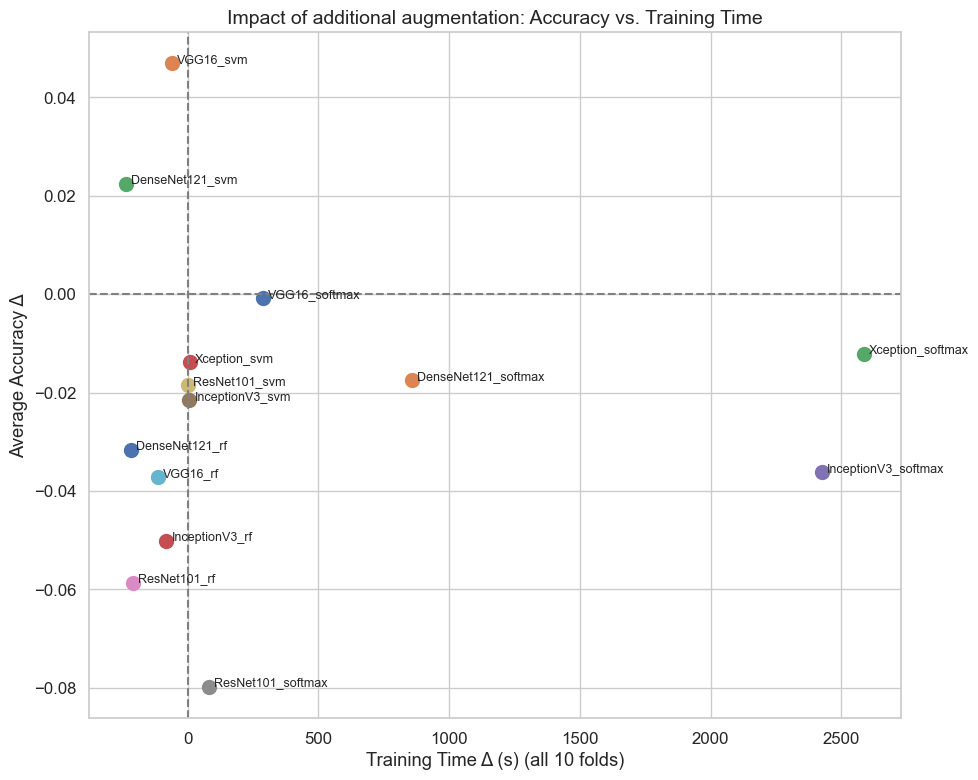

In [62]:
#plot for presentation
plot_data = pivot[['Architecture_Classifier', 'Accuracy Δ', 'training_time Δ']].dropna()

#scatter plot
plt.figure(figsize=(10,8))
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

for i, row in plot_data.iterrows():
    plt.scatter(row['training_time Δ'], row['Accuracy Δ'], s=100)
    plt.text(row['training_time Δ'] + 20, row['Accuracy Δ'], row['Architecture_Classifier'], fontsize=9)

plt.title("Impact of additional augmentation: Accuracy vs. Training Time", fontsize=14)
plt.xlabel("Training Time Δ (s) (all 10 folds)")
plt.ylabel("Average Accuracy Δ")
plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
total_training_time_after = all_results.groupby(['Architecture', 'Classifier'])['Training Time (s)'].sum().reset_index()

total_training_time_after = total_training_time_after.rename(columns={'Training Time (s)': 'Total Training Time'})
print(total_training_time_after)


   Architecture Classifier  Total Training Time
0   DenseNet121         rf           864.826254
1   DenseNet121    softmax          5283.964512
2   DenseNet121        svm           861.803570
3   InceptionV3         rf           670.877769
4   InceptionV3    softmax          5478.712065
5   InceptionV3        svm           970.302260
6     ResNet101         rf           682.063011
7     ResNet101    softmax          4012.808160
8     ResNet101        svm          1040.050216
9         VGG16         rf           377.524808
10        VGG16    softmax          3329.772501
11        VGG16        svm           406.484634
12     Xception    softmax          7470.020971
13     Xception        svm          1078.700960


/var/folders/wx/xgpv52sj18xfvw0gwvgctrjr0000gq/T/ipykernel_12036/1484153781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted['Model'] = melted['Architecture'] + '_' + melted['Classifier']


Text(0.5, 1.0, 'Accuracy Before vs After Additional Augmentation')

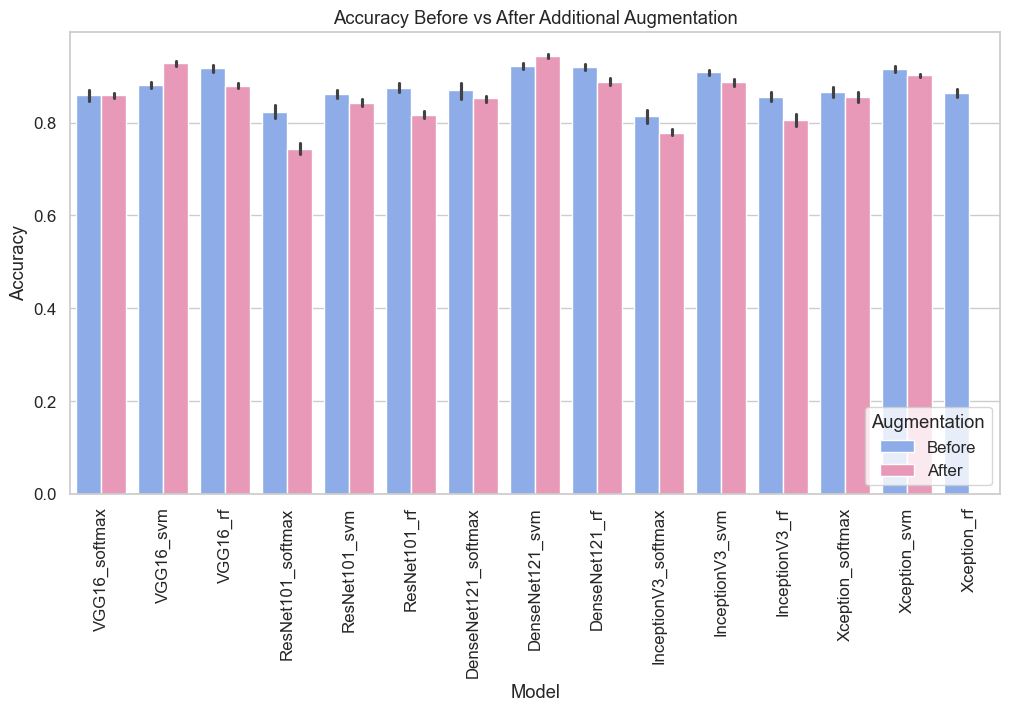

In [64]:
melted = all_data[['Architecture', 'Classifier', 'Augmentation', 'Accuracy']]
melted['Model'] = melted['Architecture'] + '_' + melted['Classifier']

plt.figure(figsize=(12,6))
sns.barplot(data=melted, x='Model', y ='Accuracy', hue='Augmentation', palette= ['#7ea7f7', '#f58cb4'] 
)
plt.xticks(rotation=90)
plt.title("Accuracy Before vs After Additional Augmentation")

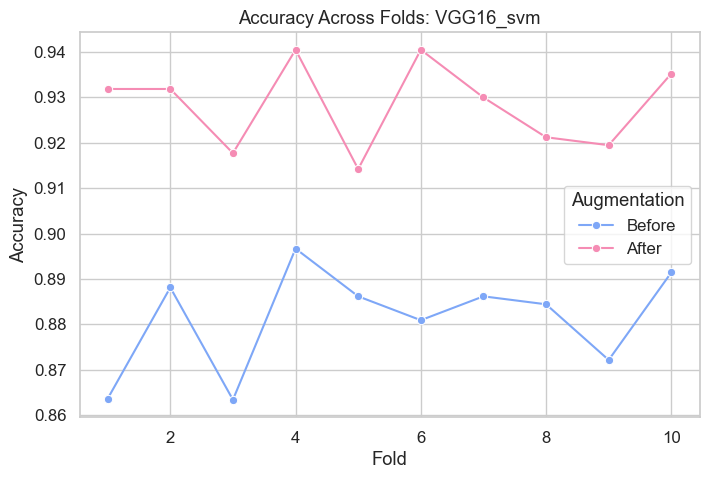

In [65]:
subset = all_data[(all_data['Architecture'] == 'VGG16') & (all_data['Classifier'] == 'svm')]

plt.figure(figsize=(8,5))
sns.lineplot(data=subset, x='Fold', y='Accuracy', hue='Augmentation', palette=['#7ea7f7', '#f58cb4'] , marker='o')
plt.title("Accuracy Across Folds: VGG16_svm")
plt.show()

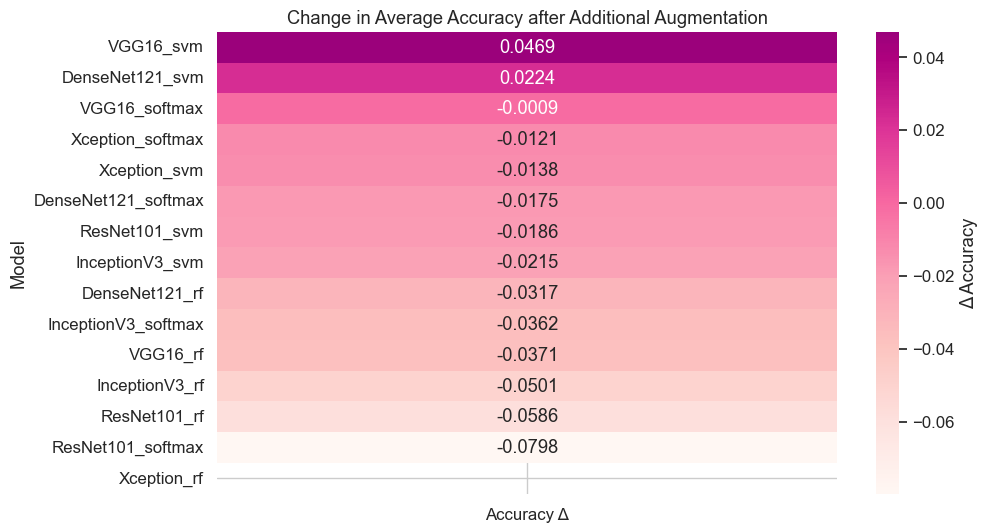

In [66]:
plt.figure(figsize=(10,6))
acc_order = pivot.sort_values('Accuracy Δ', ascending=False)['Architecture_Classifier']
sns.heatmap(
    pivot.set_index('Architecture_Classifier').loc[acc_order][['Accuracy Δ']],
    annot=True, cmap='RdPu', center=0, fmt=".4f", cbar_kws={'label': 'Δ Accuracy'}
)
plt.title('Change in Average Accuracy after Additional Augmentation')
plt.ylabel("Model")
plt.show()

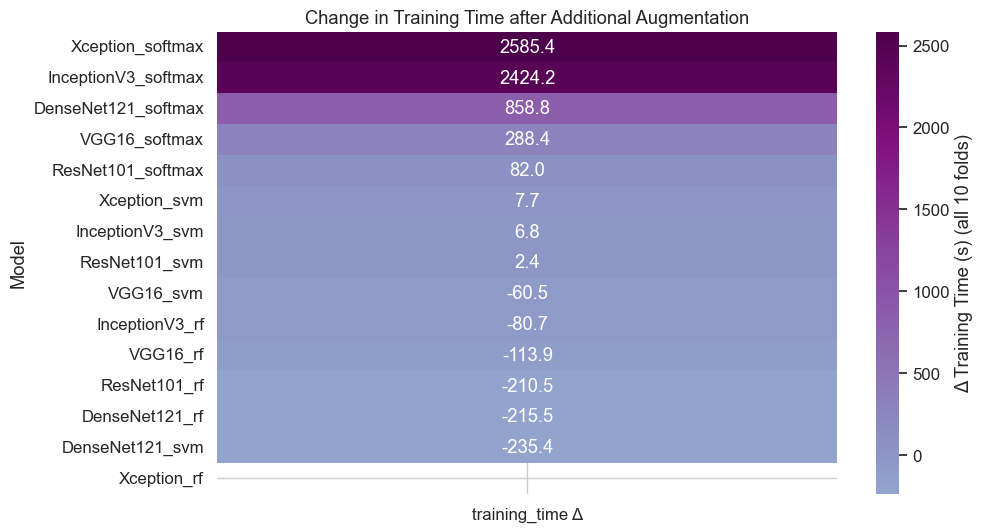

In [67]:
#heatmap: training time
plt.figure(figsize=(10,6))
tt_order = pivot.sort_values('training_time Δ', ascending=False)['Architecture_Classifier']
sns.heatmap(
    pivot.set_index('Architecture_Classifier').loc[tt_order][['training_time Δ']],
    annot=True, cmap='BuPu', center=0, fmt=".1f", cbar_kws={'label': 'Δ Training Time (s) (all 10 folds)'}
)
plt.title('Change in Training Time after Additional Augmentation')
plt.ylabel("Model")
plt.show()

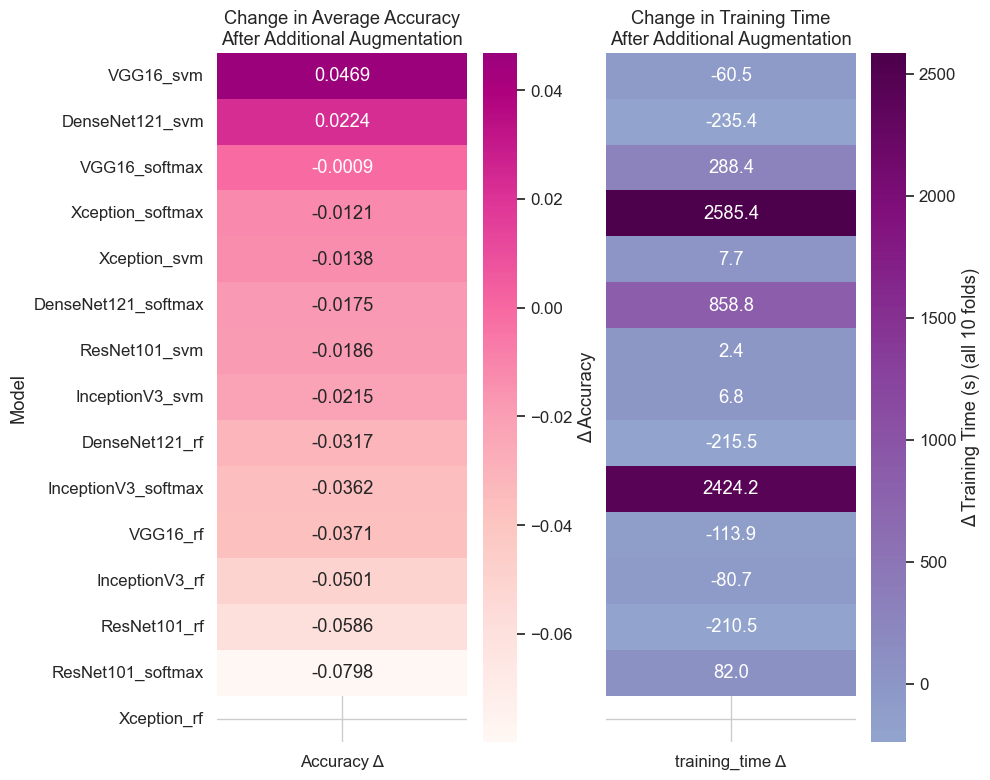

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharey=True)

# Sort by Accuracy Δ
acc_order = pivot.sort_values('Accuracy Δ', ascending=False)['Architecture_Classifier']

# Heatmap: Accuracy Δ
sns.heatmap(
    pivot.set_index('Architecture_Classifier').loc[acc_order][['Accuracy Δ']],
    annot=True,
    cmap='RdPu',
    center=0,
    fmt=".4f",
    cbar_kws={'label': 'Δ Accuracy'},
    ax=axes[0]
)
axes[0].set_title('Change in Average Accuracy\nAfter Additional Augmentation')
axes[0].set_ylabel("Model")

# Heatmap: Training Time Δ (same order as Accuracy for easy comparison)
sns.heatmap(
    pivot.set_index('Architecture_Classifier').loc[acc_order][['training_time Δ']],
    annot=True,
    cmap='BuPu',
    center=0,
    fmt=".1f",
    cbar_kws={'label': 'Δ Training Time (s) (all 10 folds)'},
    ax=axes[1]
)
axes[1].set_title('Change in Training Time\nAfter Additional Augmentation')
axes[1].set_ylabel("")  # Remove redundant label

plt.tight_layout()
plt.show()


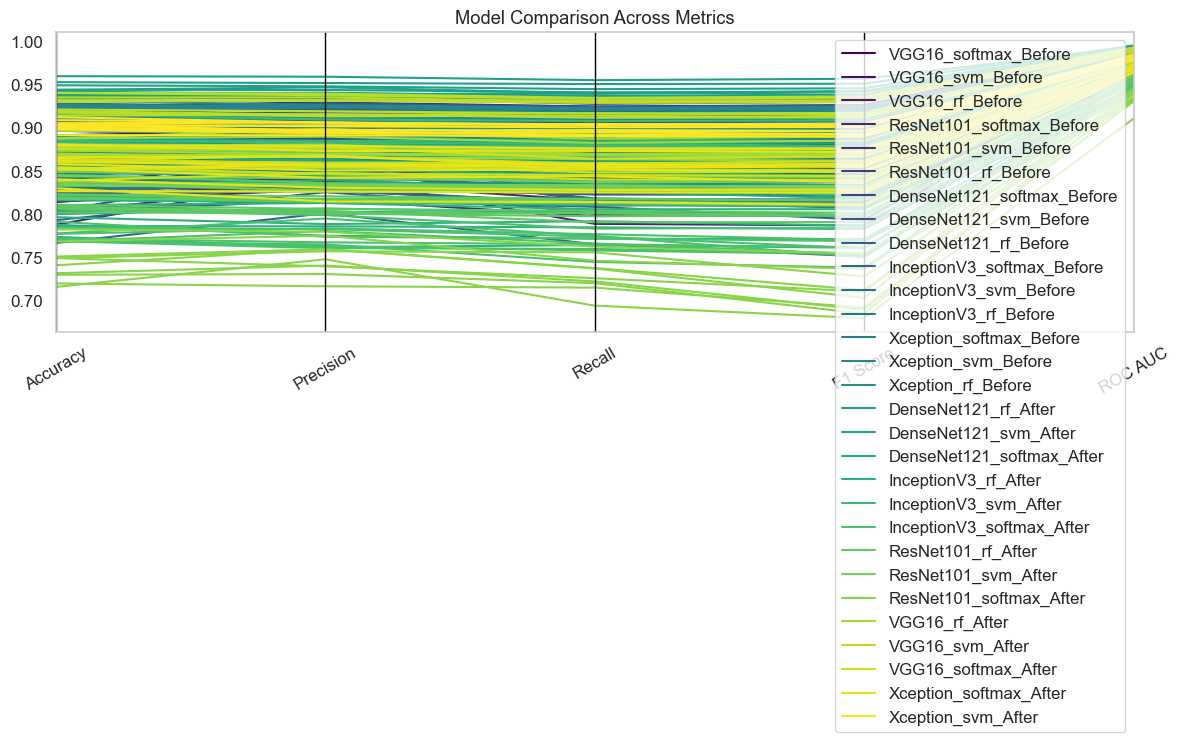

In [69]:
from pandas.plotting import parallel_coordinates

subset = all_data.copy()
subset['Model'] = subset['Architecture'] + '_' + subset['Classifier'] + '_' + subset['Augmentation']
parallel_data = subset[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']]

plt.figure(figsize=(12,6))
parallel_coordinates(parallel_data, 'Model', colormap='viridis')
plt.xticks(rotation=30)
plt.title("Model Comparison Across Metrics")
plt.tight_layout()
plt.show()

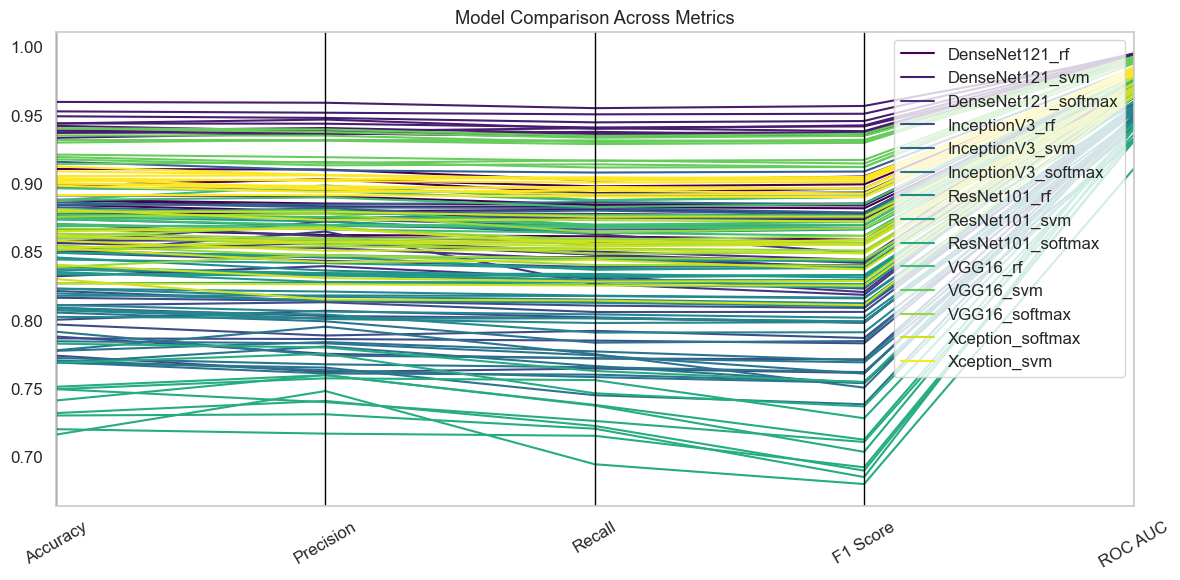

In [70]:

subset = all_results.copy()
subset['Model'] = subset['Architecture'] + '_' + subset['Classifier'] 
parallel_data = subset[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']]

plt.figure(figsize=(12,6))
parallel_coordinates(parallel_data, 'Model', colormap='viridis')
plt.xticks(rotation=30)
plt.title("Model Comparison Across Metrics")
plt.tight_layout()
plt.show()

/var/folders/wx/xgpv52sj18xfvw0gwvgctrjr0000gq/T/ipykernel_12036/1119309813.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/var/folders/wx/xgpv52sj18xfvw0gwvgctrjr0000gq/T/ipykernel_12036/1119309813.py:18: UserWarning: 
The palette list has fewer values (5) than needed (14) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(


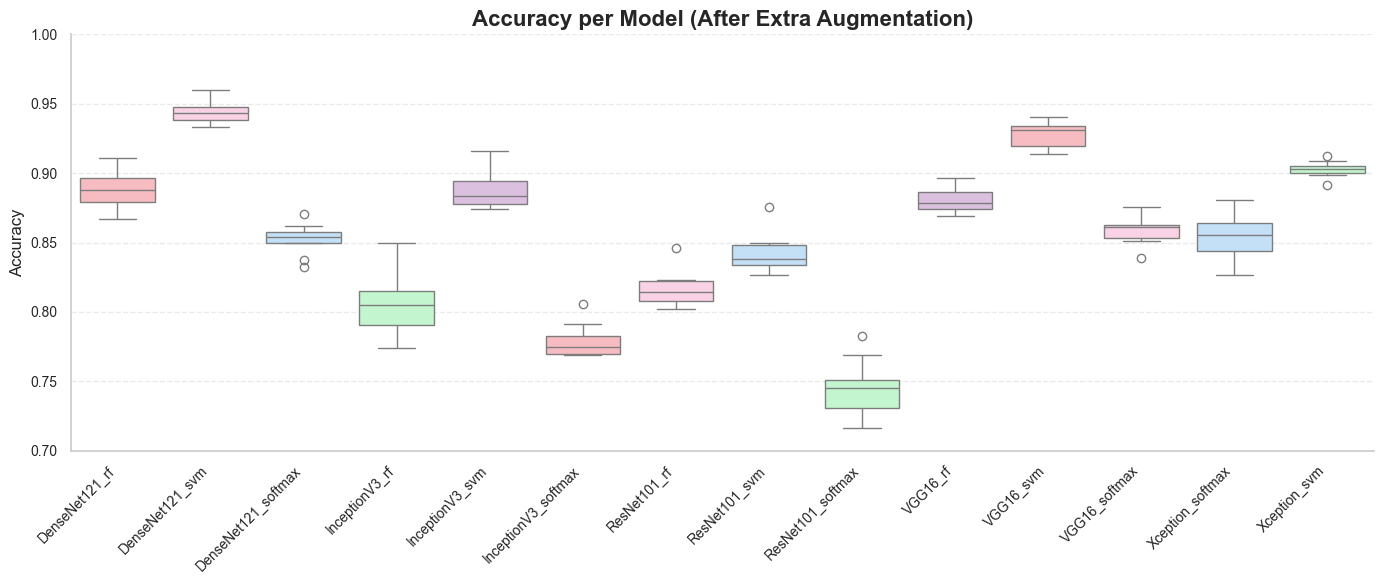

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Set a soft, "girly" pastel theme
sns.set(style="whitegrid", palette="pastel")
mpl.rcParams['font.family'] = 'sans-serif'
pastel_palette = ["#FFB3BA", "#FFCCE5", "#BAE1FF", "#BAFFC9", "#E0BBE4"]


# Create the Model column
all_results['Model'] = all_results['Architecture'] + '_' + all_results['Classifier']

unique_models = all_results['Model'].unique()
color_palette = pastel_palette * (len(unique_models) // len(pastel_palette) + 1)
# Set up the figure
plt.figure(figsize=(14, 6))
ax = sns.boxplot(
    data=all_results,
    x='Model',
    y='Accuracy',
    palette=pastel_palette
)

# Customize the appearance
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Accuracy per Model (After Extra Augmentation)", fontsize=16, weight='bold')
plt.ylim(0.7, 1)
plt.xlabel("")
plt.ylabel("Accuracy", fontsize=12)

# Add a subtle grid and clean layout
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

# Show it
plt.show()

/var/folders/wx/xgpv52sj18xfvw0gwvgctrjr0000gq/T/ipykernel_12036/711244553.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


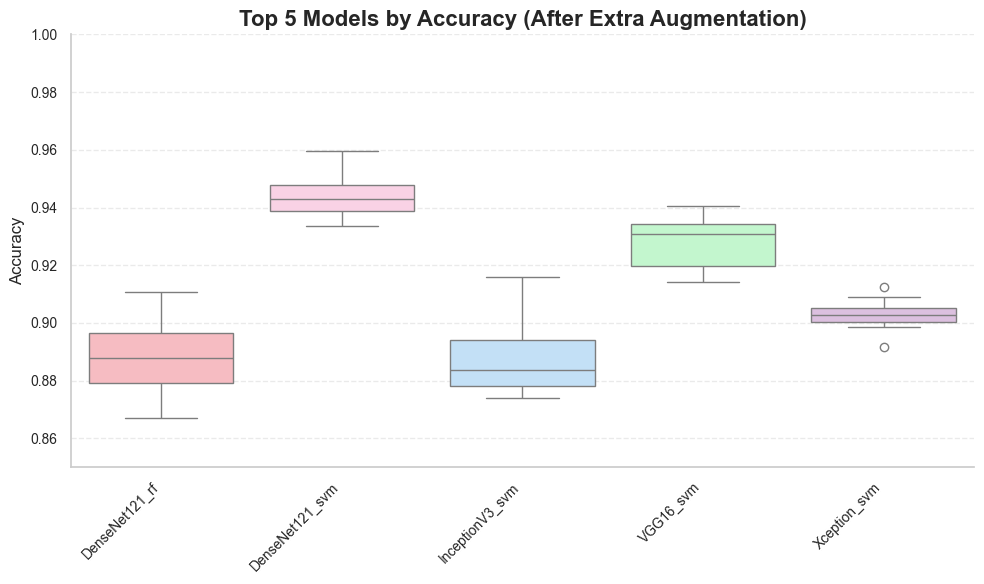

In [72]:
# Set a soft, "girly" pastel theme
sns.set(style="whitegrid", palette="pastel")
mpl.rcParams['font.family'] = 'sans-serif'
pastel_palette = ["#FFB3BA", "#FFCCE5", "#BAE1FF", "#BAFFC9", "#E0BBE4"]

# Create the Model column
all_results['Model'] = all_results['Architecture'] + '_' + all_results['Classifier']

# Calculate mean accuracy per model and get top 5
top5_models = (
    all_results.groupby('Model')['Accuracy']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter the DataFrame to only include top 5 models
top_results = all_results[all_results['Model'].isin(top5_models)]

# Set up the figure
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=top_results,
    x='Model',
    y='Accuracy',
    palette=pastel_palette[:5]  # Only 5 colors needed
)

# Customize the appearance
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Top 5 Models by Accuracy (After Extra Augmentation)", fontsize=16, weight='bold')
plt.ylim(0.85, 1)
plt.xlabel("")
plt.ylabel("Accuracy", fontsize=12)

# Add a subtle grid and clean layout
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

# Show it
plt.show()


/var/folders/wx/xgpv52sj18xfvw0gwvgctrjr0000gq/T/ipykernel_12036/2036582621.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/var/folders/wx/xgpv52sj18xfvw0gwvgctrjr0000gq/T/ipykernel_12036/2036582621.py:8: UserWarning: 
The palette list has fewer values (5) than needed (15) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(


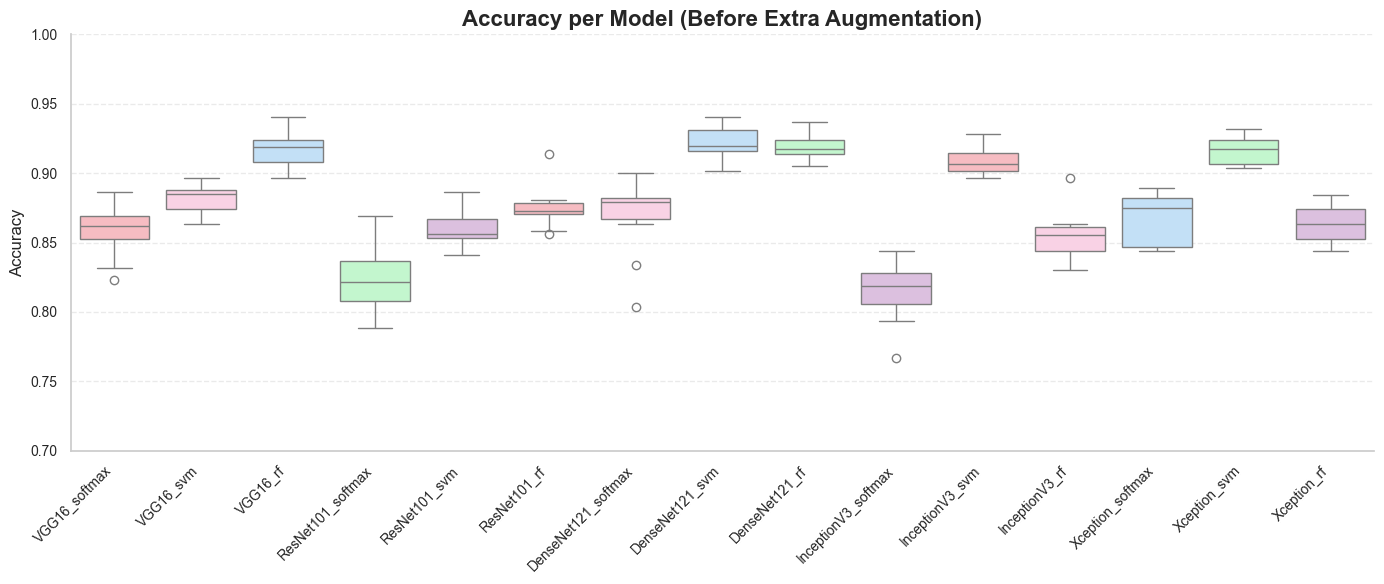

In [73]:
all_model_before['Model'] = all_model_before['Architecture'] + '_' + all_model_before['Classifier']


unique_models = all_model_before['Model'].unique()
color_palette = pastel_palette * (len(unique_models) // len(pastel_palette) + 1)
# Set up the figure
plt.figure(figsize=(14, 6))
ax = sns.boxplot(
    data=all_model_before,
    x='Model',
    y='Accuracy',
    palette=pastel_palette
)

# Customize the appearance
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Accuracy per Model (Before Extra Augmentation)", fontsize=16, weight='bold')
plt.ylim(0.7, 1)
plt.xlabel("")
plt.ylabel("Accuracy", fontsize=12)

# Add a subtle grid and clean layout
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

# Show it
plt.show()

/var/folders/wx/xgpv52sj18xfvw0gwvgctrjr0000gq/T/ipykernel_12036/861801.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_models_after, x='Architecture_Classifier', y='Accuracy_mean_After', palette=pastel_palette)


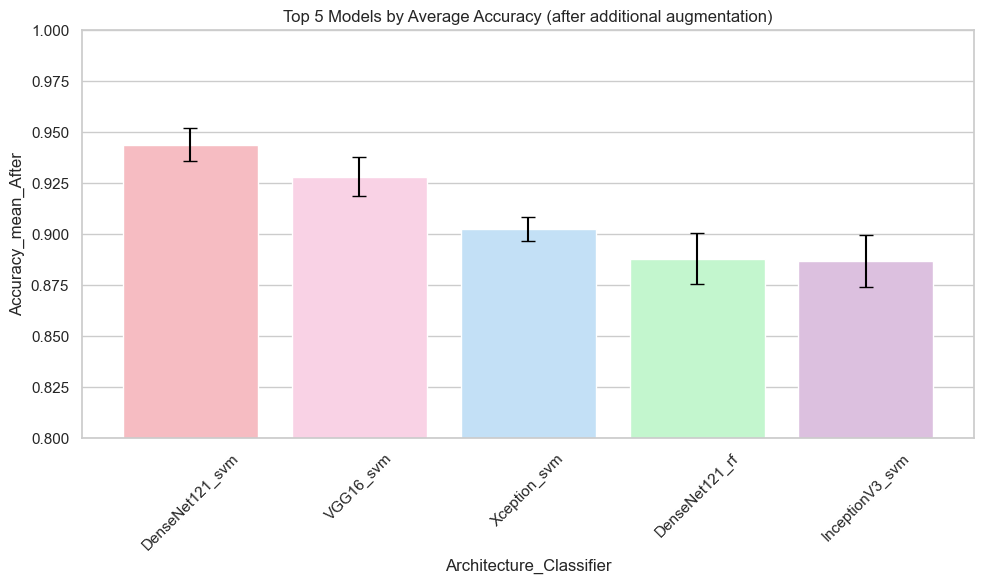

In [74]:
top_models_after = pivot.sort_values("Accuracy_mean_After", ascending=False).head(5)
plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_models_after, x='Architecture_Classifier', y='Accuracy_mean_After', palette=pastel_palette)

# Add error bars manually
plt.errorbar(
    x=range(len(top_models_after)),
    y=top_models_after['Accuracy_mean_After'],
    yerr=top_models_after['Accuracy_std_After'],
    fmt='none',  # no marker
    c='black',
    capsize=5
)

plt.title("Top 5 Models by Average Accuracy (after additional augmentation)")
plt.xticks(rotation=45)
plt.ylim(0.8,1)
plt.tight_layout()
plt.show()


/var/folders/wx/xgpv52sj18xfvw0gwvgctrjr0000gq/T/ipykernel_12036/4134922383.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_models_before,


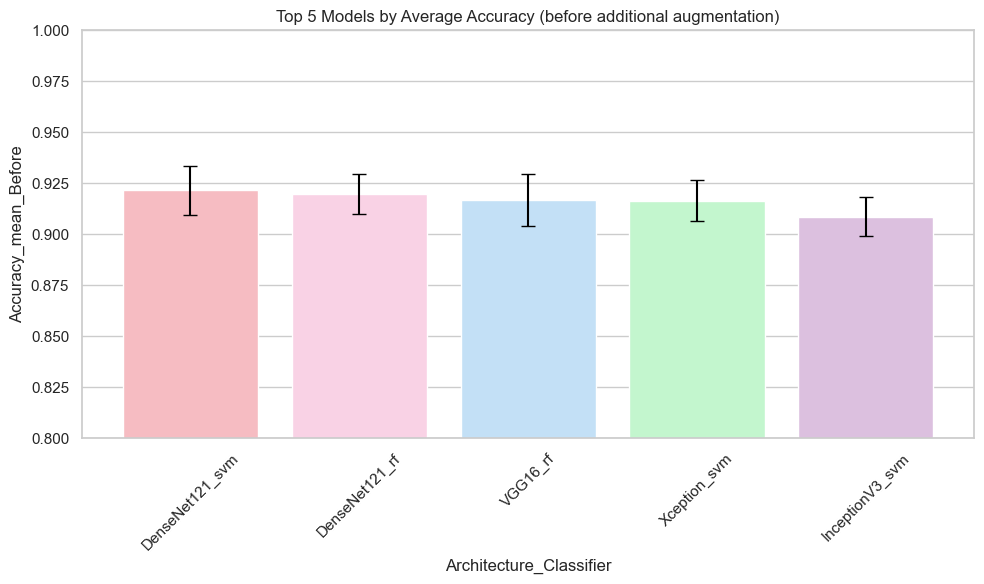

In [75]:
top_models_before = pivot.sort_values("Accuracy_mean_Before", ascending=False).head(5)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_models_before, 
                x='Architecture_Classifier', 
                y='Accuracy_mean_Before', 
                palette=pastel_palette)

# Add error bars manually
plt.errorbar(
    x=range(len(top_models_before)),
    y=top_models_before['Accuracy_mean_Before'],
    yerr=top_models_before['Accuracy_std_Before'],
    fmt='none',  # no marker
    c='black',
    capsize=5
)

plt.title("Top 5 Models by Average Accuracy (before additional augmentation)")
plt.xticks(rotation=45)
plt.ylim(0.8,1)
plt.tight_layout()
plt.show()

In [76]:
all_model_before

# list of metric columns
metric_cols = [
    "Accuracy", "Precision", "Recall", "Specificity",
    "F1 Score", "ROC AUC", "training_time"
]

# group by architecture and classifier, then calculate mean and std
grouped_before = all_model_before.groupby(["Architecture", "Classifier"])[metric_cols]

mean_df_before = grouped_before.mean().add_suffix(" Mean")
std_df_before = grouped_before.std().add_suffix(" Sd")

# merge mean and sd side by side
summary_df_before = pd.concat([mean_df_before, std_df_before], axis=1).reset_index()

summary_df_before

,Architecture,Classifier,Accuracy Mean,Precision Mean,Recall Mean,Specificity Mean,F1 Score Mean,ROC AUC Mean,training_time Mean,Accuracy Sd,Precision Sd,Recall Sd,Specificity Sd,F1 Score Sd,ROC AUC Sd,training_time Sd
0,DenseNet121,rf,0.919819,0.918884,0.916345,0.973476,0.916517,0.989855,1080.318468,0.009786,0.010752,0.009144,0.003092,0.010328,0.001672,0.0
1,DenseNet121,softmax,0.869927,0.885895,0.869089,0.957332,0.868009,0.980708,4425.143185,0.029726,0.017198,0.027232,0.009574,0.030020,0.003647,0.0
2,DenseNet121,svm,0.921570,0.921714,0.918123,0.974049,0.918660,0.989629,1097.224751,0.011944,0.011610,0.010391,0.003915,0.011307,0.002092,0.0
3,InceptionV3,rf,0.855396,0.851462,0.849172,0.952120,0.848381,0.966743,751.615787,0.017997,0.016671,0.015220,0.006044,0.016473,0.003638,0.0
4,InceptionV3,softmax,0.814948,0.832386,0.813433,0.939365,0.809919,0.967110,3054.528743,0.022393,0.015865,0.020005,0.007267,0.024647,0.004516,0.0
5,InceptionV3,svm,0.908615,0.906487,0.904629,0.969872,0.904401,0.985588,963.463073,0.009643,0.009796,0.008990,0.003231,0.009215,0.002322,0.0
6,ResNet101,rf,0.875354,0.871405,0.870237,0.958791,0.869405,0.976526,892.575843,0.015860,0.015849,0.014632,0.005178,0.015435,0.003581,0.0
7,ResNet101,softmax,0.824048,0.843195,0.820417,0.941947,0.821761,0.967160,3930.803381,0.023807,0.018214,0.022910,0.007525,0.024494,0.004297,0.0
8,ResNet101,svm,0.860994,0.857571,0.856244,0.954037,0.855719,0.970895,1037.697814,0.014125,0.014660,0.013103,0.004680,0.013753,0.003429,0.0
9,VGG16,rf,0.916844,0.916847,0.913626,0.972461,0.913858,0.988320,491.390807,0.012749,0.013545,0.011950,0.004008,0.013267,0.001904,0.0


/var/folders/wx/xgpv52sj18xfvw0gwvgctrjr0000gq/T/ipykernel_12036/1436313986.py:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(


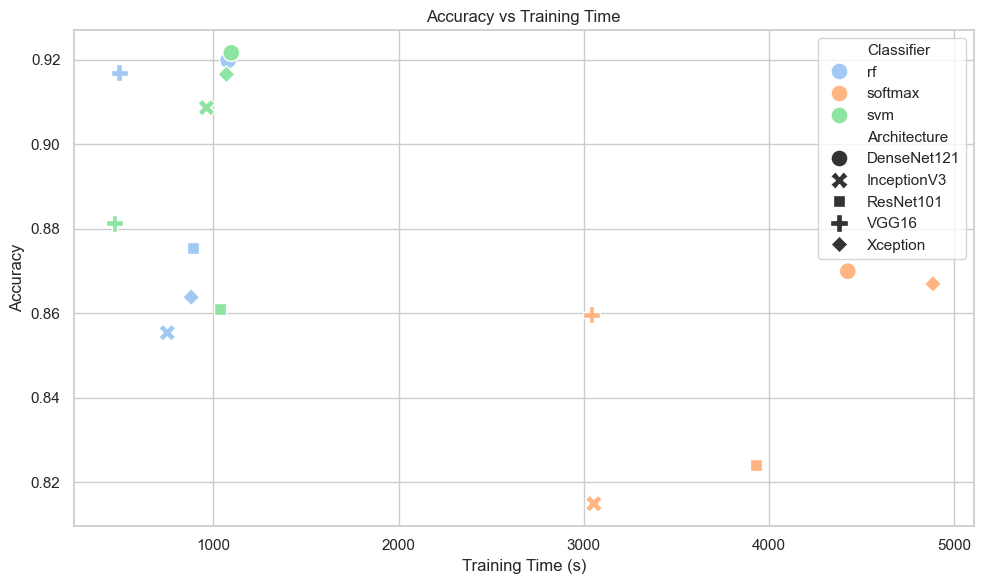

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=summary_df_before,
    x="training_time Mean",
    y="Accuracy Mean",
    hue="Classifier",
    palette=sns.color_palette("pastel"),
    style="Architecture",
    s=150
)
plt.title("Accuracy vs Training Time")
plt.xlabel("Training Time (s)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/wx/xgpv52sj18xfvw0gwvgctrjr0000gq/T/ipykernel_12036/2980452406.py:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(


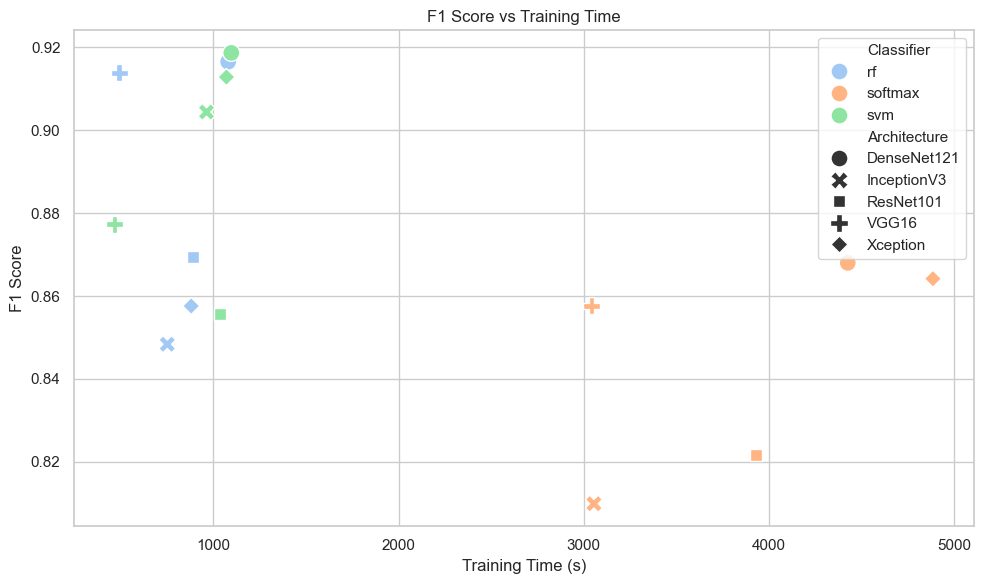

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=summary_df_before,
    x="training_time Mean",
    y="F1 Score Mean",
    hue="Classifier",
    palette=sns.color_palette("pastel"),
    style="Architecture",
    s=150
)
plt.title("F1 Score vs Training Time")
plt.xlabel("Training Time (s)")
plt.ylabel("F1 Score")
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/wx/xgpv52sj18xfvw0gwvgctrjr0000gq/T/ipykernel_12036/2978331618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_models_before,


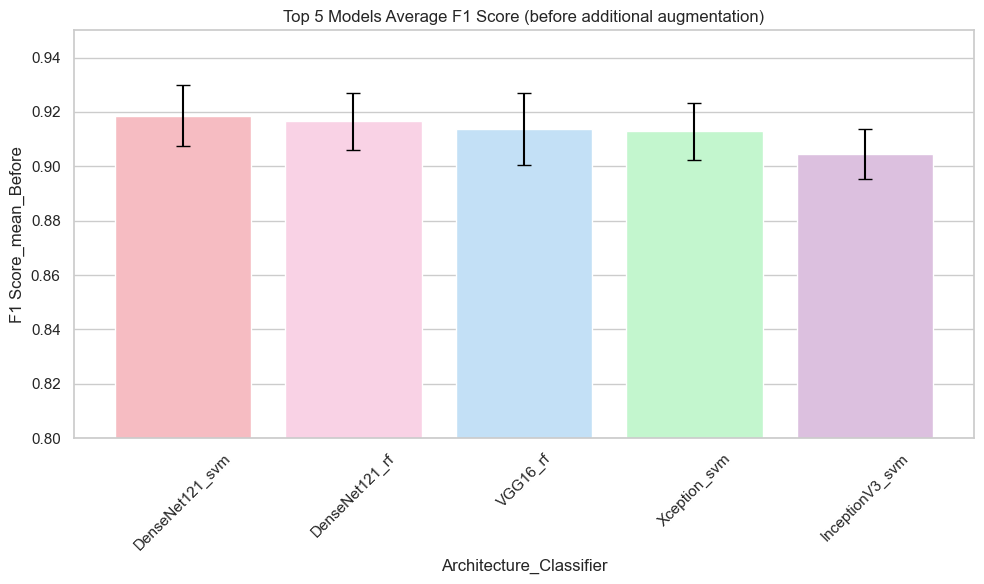

In [79]:
top_models_before = pivot.sort_values("F1 Score_mean_Before", ascending=False).head(5)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_models_before, 
                x='Architecture_Classifier', 
                y='F1 Score_mean_Before', 
                palette=pastel_palette)

# Add error bars manually
plt.errorbar(
    x=range(len(top_models_before)),
    y=top_models_before['F1 Score_mean_Before'],
    yerr=top_models_before['F1 Score_std_Before'],
    fmt='none',  # no marker
    c='black',
    capsize=5
)

plt.title("Top 5 Models Average F1 Score (before additional augmentation)")
plt.xticks(rotation=45)
plt.ylim(0.8,0.95)
plt.tight_layout()
plt.show()

In [80]:
top5_models = (
    all_model_before.groupby("Model")["Accuracy"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)
top5_rocauc_df = all_model_before[all_model_before["Model"].isin(top5_models)]
top5_rocauc_df


,Architecture,Classifier,Fold,Accuracy,Precision,Recall,Specificity,F1 Score,ROC AUC,training_time,Augmentation,Model
20,VGG16,rf,1,0.902098,0.903067,0.902171,0.967675,0.901060,0.986132,491.390807,Before,VGG16_rf
21,VGG16,rf,2,0.917832,0.916726,0.915471,0.972733,0.915358,0.987147,491.390807,Before,VGG16_rf
22,VGG16,rf,3,0.896673,0.893430,0.893374,0.966491,0.890429,0.985449,491.390807,Before,VGG16_rf
23,VGG16,rf,4,0.940455,0.940369,0.933608,0.980078,0.936123,0.988563,491.390807,Before,VGG16_rf
24,VGG16,rf,5,0.905429,0.907795,0.902457,0.968646,0.903028,0.988640,491.390807,Before,VGG16_rf
25,VGG16,rf,6,0.915937,0.914652,0.909231,0.972011,0.910811,0.989200,491.390807,Before,VGG16_rf
26,VGG16,rf,7,0.924694,0.929446,0.924754,0.974395,0.926336,0.991868,491.390807,Before,VGG16_rf
27,VGG16,rf,8,0.921191,0.920572,0.917521,0.973971,0.917726,0.987111,491.390807,Before,VGG16_rf
28,VGG16,rf,9,0.919440,0.915621,0.917450,0.973869,0.915221,0.989192,491.390807,Before,VGG16_rf
29,VGG16,rf,10,0.924694,0.926789,0.920226,0.974736,0.922487,0.989899,491.390807,Before,VGG16_rf


/var/folders/wx/xgpv52sj18xfvw0gwvgctrjr0000gq/T/ipykernel_12036/741508941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


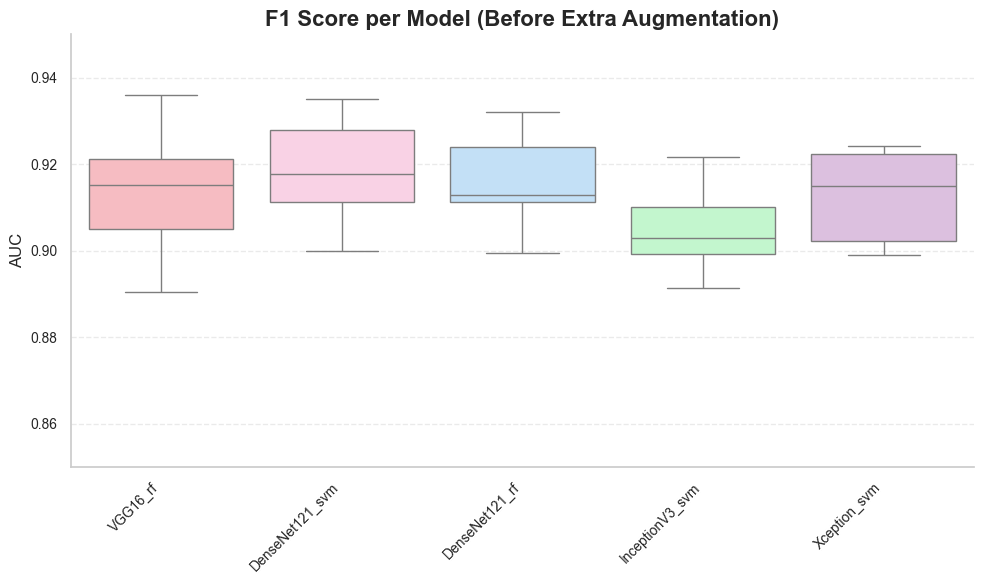

In [81]:

# Set up the figure
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=top5_rocauc_df,
    x='Model',
    y='F1 Score',
    palette=pastel_palette
)

# Customize the appearance
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("F1 Score per Model (Before Extra Augmentation)", fontsize=16, weight='bold')
plt.ylim(0.7, 1)
plt.xlabel("")
plt.ylabel("AUC", fontsize=12)

# Add a subtle grid and clean layout
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.ylim(0.85,0.95)
plt.tight_layout()

# Show it
plt.show()

In [82]:
# look at acc/loss grapohs to assess overfitting
import json


with open("../src/histories/history_VGG16_softmax_fold1.json") as f:
    history_vgg = json.load(f)

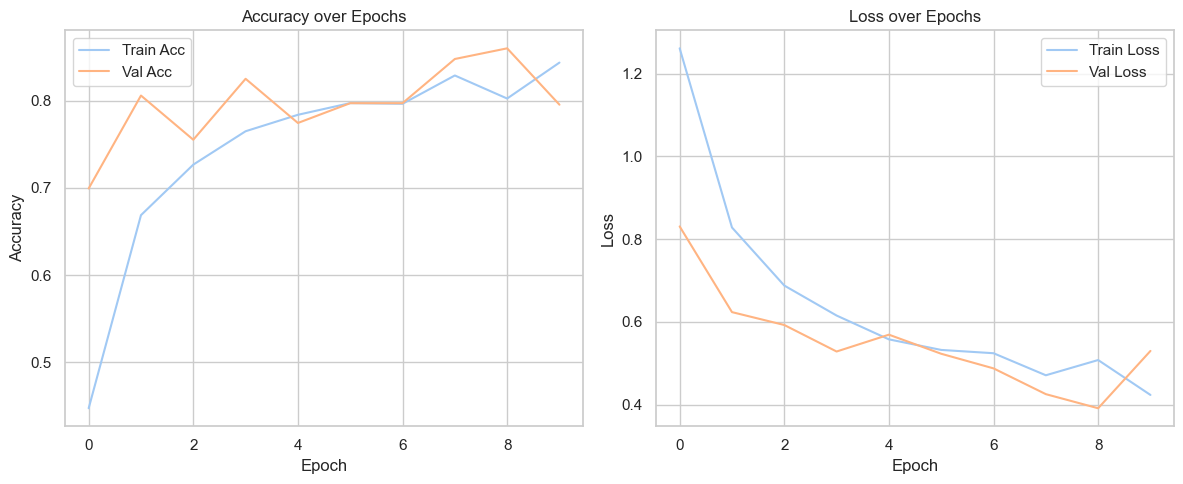

In [83]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_vgg['accuracy'], label='Train Acc')
plt.plot(history_vgg['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history_vgg['loss'], label='Train Loss')
plt.plot(history_vgg['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

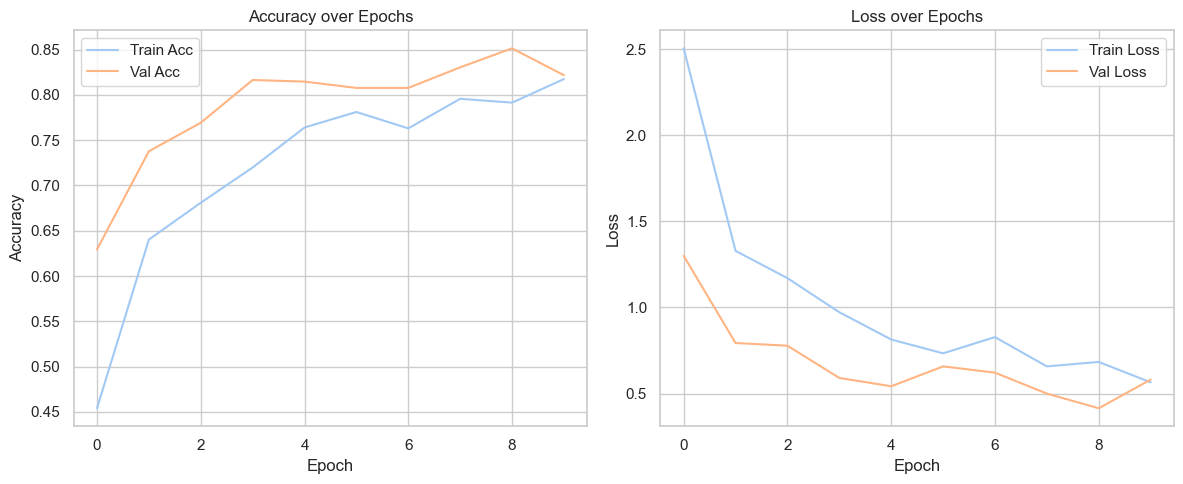

In [84]:
with open("../src/histories/history_DenseNet121_softmax_fold1.json") as f:
    history_densenet = json.load(f)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_densenet['accuracy'], label='Train Acc')
plt.plot(history_densenet['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history_densenet['loss'], label='Train Loss')
plt.plot(history_densenet['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

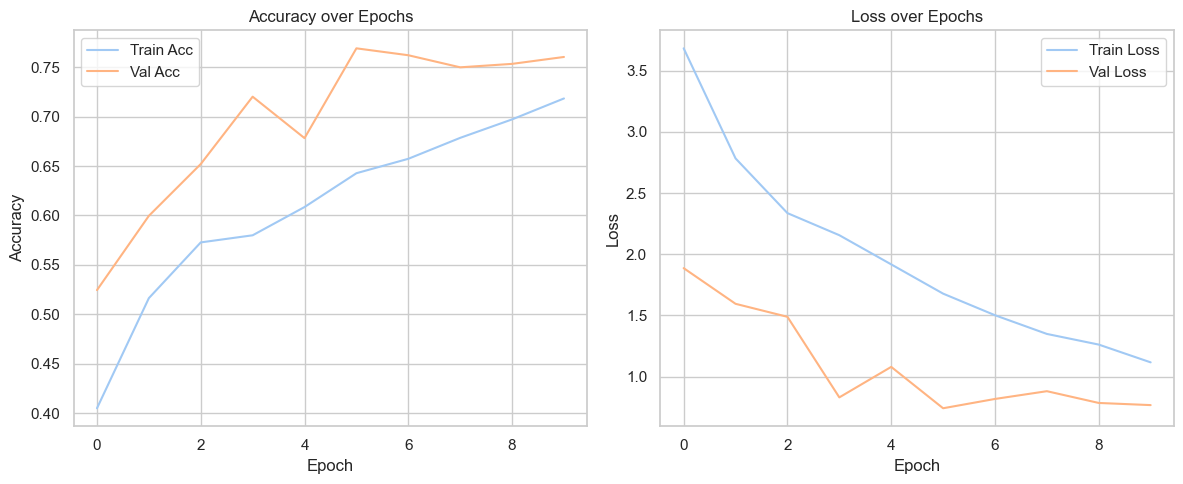

In [85]:
with open("../src/histories/history_InceptionV3_softmax_fold1.json") as f:
    history_inception = json.load(f)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_inception['accuracy'], label='Train Acc')
plt.plot(history_inception['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history_inception['loss'], label='Train Loss')
plt.plot(history_inception['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

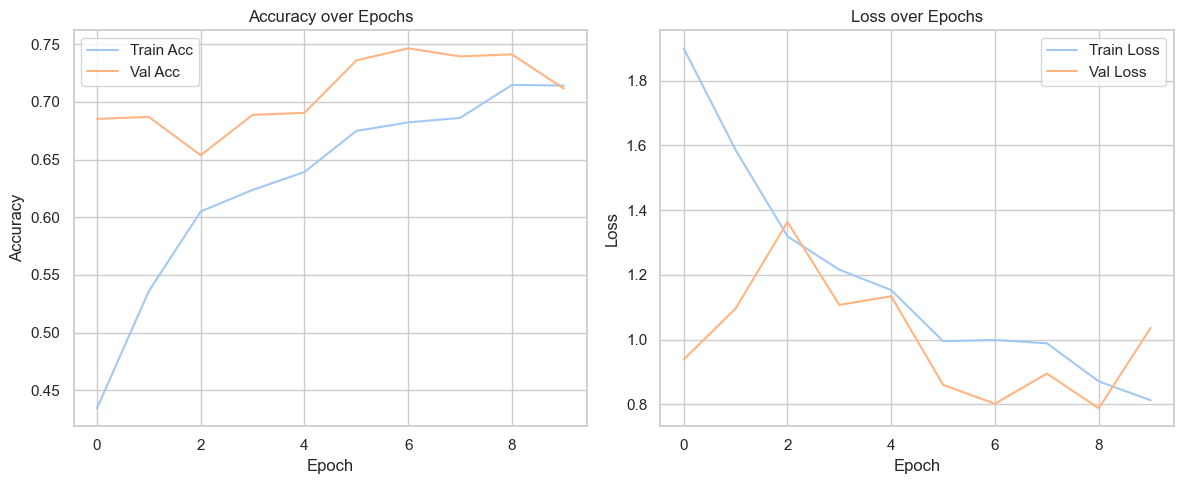

In [86]:
with open("../src/histories/history_ResNet101_softmax_fold1.json") as f:
    history_resnet = json.load(f)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_resnet['accuracy'], label='Train Acc')
plt.plot(history_resnet['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history_resnet['loss'], label='Train Loss')
plt.plot(history_resnet['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

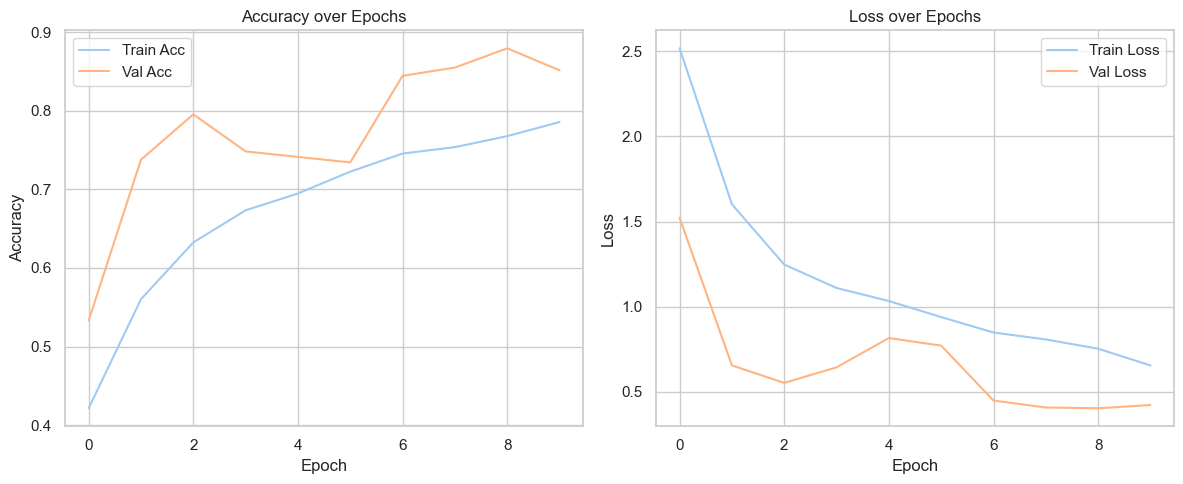

In [87]:
with open("../src/histories/history_Xception_softmax_fold1.json") as f:
    history_xception = json.load(f)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_xception['accuracy'], label='Train Acc')
plt.plot(history_xception['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history_xception['loss'], label='Train Loss')
plt.plot(history_xception['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [89]:
summary_df.sort_values('Accuracy Mean', ascending=False)

latex_cv_table = summary_df.to_latex(
    index=False,  # To not include the DataFrame index as a column in the table
    caption="Comparison of Model Performance Metrics during CV",  # The caption to appear above the table in the LaTeX document
    label="tab:cv_comparison",  # A label used for referencing the table within the LaTeX document
    position="htbp",  # The preferred positions where the table should be placed in the document ('here', 'top', 'bottom', 'page')
    column_format="lccc",  # The format of the columns: left-aligend first column and center-aligned remaining columns as per APA guidelines
    escape=False,  # Disable escaping LaTeX special characters in the DataFrame
    float_format="{:0.2f}".format  # Formats floats to two decimal places
)
print(latex_cv_table)

\begin{table}[htbp]
\caption{Comparison of Model Performance Metrics during CV}
\label{tab:cv_comparison}
\begin{tabular}{lccc}
\toprule
Architecture & Classifier & Accuracy Mean & Precision Mean & Recall Mean & Specificity Mean & F1 Score Mean & ROC AUC Mean & Training Time (s) Mean & Accuracy Sd & Precision Sd & Recall Sd & Specificity Sd & F1 Score Sd & ROC AUC Sd & Training Time (s) Sd \\
\midrule
DenseNet121 & rf & 0.89 & 0.89 & 0.88 & 0.96 & 0.88 & 0.98 & 86.48 & 0.01 & 0.01 & 0.01 & 0.00 & 0.01 & 0.00 & 6.60 \\
DenseNet121 & softmax & 0.85 & 0.85 & 0.84 & 0.95 & 0.84 & 0.97 & 528.40 & 0.01 & 0.01 & 0.01 & 0.00 & 0.01 & 0.00 & 41.54 \\
DenseNet121 & svm & 0.94 & 0.94 & 0.94 & 0.98 & 0.94 & 0.99 & 86.18 & 0.01 & 0.01 & 0.01 & 0.00 & 0.01 & 0.00 & 3.35 \\
InceptionV3 & rf & 0.81 & 0.80 & 0.80 & 0.94 & 0.80 & 0.95 & 67.09 & 0.02 & 0.02 & 0.02 & 0.01 & 0.02 & 0.01 & 6.34 \\
InceptionV3 & softmax & 0.78 & 0.78 & 0.77 & 0.93 & 0.76 & 0.94 & 547.87 & 0.01 & 0.01 & 0.01 & 0.00 & 0.01 & 0

In [ ]:
pivot

,Architecture_Classifier,Accuracy_mean_After,Accuracy_mean_Before,Accuracy_std_After,Accuracy_std_Before,F1 Score_mean_After,F1 Score_mean_Before,F1 Score_std_After,F1 Score_std_Before,Precision_mean_After,...,training_time_mean_Before,training_time_std_After,training_time_std_Before,Accuracy Δ,Precision Δ,Recall Δ,Specificity Δ,F1 Score Δ,ROC AUC Δ,training_time Δ
0,DenseNet121_rf,0.888132,0.919819,0.012567,0.009786,0.883974,0.916517,0.013627,0.010328,0.887556,...,1080.318468,0.0,0.0,-0.031687,-0.031328,-0.032504,-0.010550,-0.032544,-0.010167,-215.492213
1,DenseNet121_softmax,0.852420,0.869927,0.011199,0.029726,0.837417,0.868009,0.012598,0.030020,0.854346,...,4425.143185,0.0,0.0,-0.017507,-0.031550,-0.024440,-0.006331,-0.030592,-0.008244,858.821326
2,DenseNet121_svm,0.943977,0.921570,0.007961,0.011944,0.942041,0.918660,0.007250,0.011307,0.943892,...,1097.224751,0.0,0.0,0.022407,0.022178,0.023646,0.007419,0.023381,0.003907,-235.421181
3,InceptionV3_rf,0.805323,0.855396,0.021300,0.017997,0.796688,0.848381,0.022508,0.016473,0.800755,...,751.615787,0.0,0.0,-0.050073,-0.050707,-0.050533,-0.016615,-0.051693,-0.016211,-80.738018
4,InceptionV3_softmax,0.778713,0.814948,0.012100,0.022393,0.759958,0.809919,0.012748,0.024647,0.777407,...,3054.528743,0.0,0.0,-0.036235,-0.054979,-0.045601,-0.012902,-0.049961,-0.024462,2424.183322
5,InceptionV3_svm,0.887080,0.908615,0.012767,0.009643,0.882156,0.904401,0.012812,0.009215,0.884690,...,963.463073,0.0,0.0,-0.021535,-0.021797,-0.022027,-0.007157,-0.022245,-0.006203,6.839187
6,ResNet101_rf,0.816705,0.875354,0.012516,0.015860,0.807758,0.869405,0.012220,0.015435,0.812111,...,892.575843,0.0,0.0,-0.058649,-0.059294,-0.061104,-0.019608,-0.061647,-0.026294,-210.512832
7,ResNet101_softmax,0.744227,0.824048,0.020839,0.023807,0.709498,0.821761,0.024302,0.024494,0.751020,...,3930.803381,0.0,0.0,-0.079821,-0.092175,-0.088325,-0.027130,-0.112263,-0.032550,82.004779
8,ResNet101_svm,0.842439,0.860994,0.013706,0.014125,0.835928,0.855719,0.012254,0.013753,0.839912,...,1037.697814,0.0,0.0,-0.018555,-0.017659,-0.020117,-0.006524,-0.019791,-0.006833,2.352402
9,VGG16_rf,0.879729,0.916844,0.008827,0.012749,0.875230,0.913858,0.010101,0.013267,0.879773,...,491.390807,0.0,0.0,-0.037116,-0.037074,-0.038646,-0.012381,-0.038628,-0.011151,-113.865999


In [ ]:
all_data


# list of metric columns
metric_cols = [
    "Accuracy", "Precision", "Recall", "Specificity",
    "F1 Score", "ROC AUC", "training_time"
]

# group by architecture and classifier, then calculate mean and std
grouped_ = all_data.groupby(["Architecture", "Classifier", "Augmentation"])[metric_cols]

mean_df_ = grouped_.mean().add_suffix(" Mean")
std_df_ = grouped_.std().add_suffix(" Sd")

# merge mean and sd side by side
summary_df_all = pd.concat([mean_df_, std_df_], axis=1).reset_index()

In [ ]:
summary_df_all

,Architecture,Classifier,Augmentation,Accuracy Mean,Precision Mean,Recall Mean,Specificity Mean,F1 Score Mean,ROC AUC Mean,training_time Mean,Accuracy Sd,Precision Sd,Recall Sd,Specificity Sd,F1 Score Sd,ROC AUC Sd,training_time Sd
0,DenseNet121,rf,After,0.888132,0.887556,0.883841,0.962926,0.883974,0.979689,864.826254,0.012567,0.014482,0.011926,0.003834,0.013627,0.002385,0.0
1,DenseNet121,rf,Before,0.919819,0.918884,0.916345,0.973476,0.916517,0.989855,1080.318468,0.009786,0.010752,0.009144,0.003092,0.010328,0.001672,0.0
2,DenseNet121,softmax,After,0.852420,0.854346,0.844649,0.951001,0.837417,0.972464,5283.964512,0.011199,0.011755,0.011707,0.003738,0.012598,0.004914,0.0
3,DenseNet121,softmax,Before,0.869927,0.885895,0.869089,0.957332,0.868009,0.980708,4425.143185,0.029726,0.017198,0.027232,0.009574,0.030020,0.003647,0.0
4,DenseNet121,svm,After,0.943977,0.943892,0.941769,0.981467,0.942041,0.993536,861.803570,0.007961,0.007547,0.006614,0.002673,0.007250,0.001863,0.0
5,DenseNet121,svm,Before,0.921570,0.921714,0.918123,0.974049,0.918660,0.989629,1097.224751,0.011944,0.011610,0.010391,0.003915,0.011307,0.002092,0.0
6,InceptionV3,rf,After,0.805323,0.800755,0.798639,0.935505,0.796688,0.950532,670.877769,0.021300,0.023257,0.021469,0.006901,0.022508,0.005397,0.0
7,InceptionV3,rf,Before,0.855396,0.851462,0.849172,0.952120,0.848381,0.966743,751.615787,0.017997,0.016671,0.015220,0.006044,0.016473,0.003638,0.0
8,InceptionV3,softmax,After,0.778713,0.777407,0.767832,0.926463,0.759958,0.942647,5478.712065,0.012100,0.013302,0.011156,0.004026,0.012748,0.008681,0.0
9,InceptionV3,softmax,Before,0.814948,0.832386,0.813433,0.939365,0.809919,0.967110,3054.528743,0.022393,0.015865,0.020005,0.007267,0.024647,0.004516,0.0


In [ ]:
summary_df_all.sort_values("Accuracy Mean", ascending=False)

,Architecture,Classifier,Augmentation,Accuracy Mean,Precision Mean,Recall Mean,Specificity Mean,F1 Score Mean,ROC AUC Mean,training_time Mean,Accuracy Sd,Precision Sd,Recall Sd,Specificity Sd,F1 Score Sd,ROC AUC Sd,training_time Sd
4,DenseNet121,svm,After,0.943977,0.943892,0.941769,0.981467,0.942041,0.993536,861.803570,0.007961,0.007547,0.006614,0.002673,0.007250,0.001863,0.0
22,VGG16,svm,After,0.928220,0.927077,0.924884,0.976276,0.925134,0.990615,406.484634,0.009495,0.010085,0.008911,0.003027,0.009844,0.001810,0.0
5,DenseNet121,svm,Before,0.921570,0.921714,0.918123,0.974049,0.918660,0.989629,1097.224751,0.011944,0.011610,0.010391,0.003915,0.011307,0.002092,0.0
1,DenseNet121,rf,Before,0.919819,0.918884,0.916345,0.973476,0.916517,0.989855,1080.318468,0.009786,0.010752,0.009144,0.003092,0.010328,0.001672,0.0
19,VGG16,rf,Before,0.916844,0.916847,0.913626,0.972461,0.913858,0.988320,491.390807,0.012749,0.013545,0.011950,0.004008,0.013267,0.001904,0.0
28,Xception,svm,Before,0.916493,0.914920,0.913012,0.972479,0.912831,0.987401,1071.032984,0.010163,0.010892,0.009257,0.003133,0.010573,0.002491,0.0
11,InceptionV3,svm,Before,0.908615,0.906487,0.904629,0.969872,0.904401,0.985588,963.463073,0.009643,0.009796,0.008990,0.003231,0.009215,0.002322,0.0
27,Xception,svm,After,0.902663,0.899859,0.898637,0.967887,0.898406,0.981759,1078.700960,0.005754,0.005506,0.005108,0.001878,0.005513,0.002237,0.0
0,DenseNet121,rf,After,0.888132,0.887556,0.883841,0.962926,0.883974,0.979689,864.826254,0.012567,0.014482,0.011926,0.003834,0.013627,0.002385,0.0
10,InceptionV3,svm,After,0.887080,0.884690,0.882602,0.962715,0.882156,0.979385,970.302260,0.012767,0.012272,0.012561,0.004216,0.012812,0.003484,0.0
